In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dataset = keras.preprocessing.image_dataset_from_directory(
    'skin-disease-datasaet/train_set',
    labels= 'inferred',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
)

Found 924 files belonging to 8 classes.


In [3]:
test_dataset = keras.preprocessing.image_dataset_from_directory(
    'skin-disease-datasaet/test_set',
    labels= 'inferred',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
)

Found 234 files belonging to 8 classes.


In [4]:
len(test_dataset)

8

In [5]:
len(test_dataset)*0.5

4.0

In [6]:
val_dataset = test_dataset.take(4)
test_dataset = test_dataset.skip(4)

In [7]:
len(val_dataset)

4

In [8]:
len(test_dataset)

4

In [9]:
train_dataset.class_names

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [10]:
classes = ['BA- cellulitis','BA-impetigo','FU-athlete-foot','FU-nail-fungus',
           'FU-ringworm','PA-cutaneous-larva-migrans','VI-chickenpox','VI-shingles']

In [11]:
for image,label in train_dataset.take(1):
    print(image.shape)
    print(label)

(32, 224, 224, 3)
tf.Tensor([6 3 5 2 3 5 1 3 5 4 6 4 5 0 3 5 4 6 5 2 3 5 2 0 7 2 5 7 0 1 0 0], shape=(32,), dtype=int32)


In [12]:
from matplotlib import pyplot as plt
import numpy as np

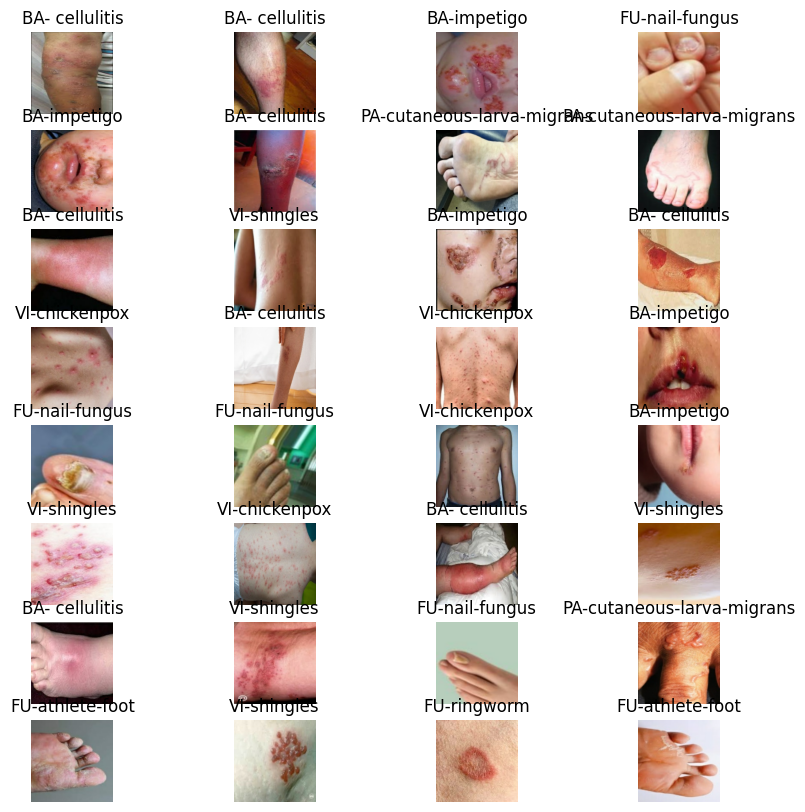

In [13]:
plt.figure(figsize=(10,10))
for image,label in train_dataset.take(1):
    for i in range(32):
        ax =plt.subplot(8,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classes[label[i].numpy()])
        plt.axis('off')

In [14]:
from keras import layers

In [15]:
rescaling_resizing_layer = keras.Sequential([
    layers.Resizing(224,224),
    layers.Rescaling(1.0/255)
    ])

In [16]:
data_agumentation_layer = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [17]:
model = keras.Sequential([
    rescaling_resizing_layer,
    data_agumentation_layer,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(8,activation='softmax')
])

In [18]:
model.build(input_shape=(32,224,224,3))

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 9216)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 8)                     │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,656 (2.61 MB)

 Trainable params: 683,656 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train_dataset,validation_data=val_dataset,epochs=45,verbose=1)

Epoch 1/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 767ms/step - accuracy: 0.1419 - loss: 2.0780 - val_accuracy: 0.2812 - val_loss: 1.9922
Epoch 2/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 746ms/step - accuracy: 0.2273 - loss: 2.0026 - val_accuracy: 0.3594 - val_loss: 1.8665
Epoch 3/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 800ms/step - accuracy: 0.2658 - loss: 1.8396 - val_accuracy: 0.3672 - val_loss: 1.6981
Epoch 4/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 796ms/step - accuracy: 0.3657 - loss: 1.7051 - val_accuracy: 0.4609 - val_loss: 1.5548
Epoch 5/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 769ms/step - accuracy: 0.4050 - loss: 1.5805 - val_accuracy: 0.4531 - val_loss: 1.5766
Epoch 6/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 777ms/step - accuracy: 0.4801 - loss: 1.4394 - val_accuracy: 0.5078 - val_loss: 1.4744
Epoch 7/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 752ms/step - accuracy: 0.5054 - loss: 1.4499 - val_accuracy: 0.4922 - val_loss: 1.5122
Epoch 8/45
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 804ms/step - accuracy: 0.5427 - loss: 1.2920 - val_accu

In [21]:
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.1763 - loss: 2.1022


[2.098600387573242, 0.16981132328510284]

In [22]:
image = 'skin-disease-datasaet/test_set/FU-nail-fungus/_25_9641.jpg'
img = tf.keras.preprocessing.image.load_img(image,target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.expand_dims(img,0)
prediction = model.predict(img)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


array([[0.1392206 , 0.12480713, 0.11428501, 0.10910293, 0.11522291,
        0.13054071, 0.12975855, 0.13706216]], dtype=float32)

In [23]:
print(classes[np.argmax(prediction)])
print(np.max(prediction)*100)

BA- cellulitis
13.92206


In [24]:
from tensorflow.keras.applications import EfficientNetB0

In [25]:
model1 = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [26]:
model1.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 224, 224, 3)       │               7 │ rescaling_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_2[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             288 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [27]:
model1.trainable = False
model2 = keras.Sequential([
    data_agumentation_layer,
    model1
])

In [28]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (32, 7, 7, 1280)            │       4,049,571 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [29]:
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(8,activation='softmax'))

In [30]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (32, 7, 7, 1280)            │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 62720)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 62720)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 8)                     │         501,768 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,551,339 (17.36 MB)

 Trainable params: 501,768 (1.91 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [31]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model2.fit(train_dataset,validation_data=val_dataset,verbose=1,epochs=5)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5429 - loss: 2.0861 - val_accuracy: 0.8828 - val_loss: 0.5691
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9245 - loss: 0.3459 - val_accuracy: 0.9375 - val_loss: 0.1781
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9453 - loss: 0.2128 - val_accuracy: 0.9531 - val_loss: 0.2021
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9209 - loss: 0.3722 - val_accuracy: 0.9141 - val_loss: 0.3022
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9415 - loss: 0.1785 - val_accuracy: 0.9375 - val_loss: 0.3794


In [33]:
model2.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 917ms/step - accuracy: 0.9334 - loss: 0.3687


[0.3979775011539459, 0.9245283007621765]

In [39]:
image = 'skin-disease-datasaet/test_set/FU-nail-fungus/_12_2082.jpg'
img = tf.keras.preprocessing.image.load_img(image,target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.expand_dims(img,0)
prediction = model2.predict(img)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


array([[7.8148805e-06, 3.3886177e-08, 3.0768330e-08, 9.9999201e-01,
        1.5309864e-08, 9.6235290e-08, 1.5381879e-14, 7.3704082e-10]],
      dtype=float32)

In [35]:
classes[np.argmax(prediction)]

'FU-ringworm'

In [36]:
model2.save('model.h5')

In [38]:
type(prediction)

numpy.ndarray